In [ ]:
###### 01 查看数据集基本信息 ######

import numpy as np

data = np.load("Train/xingwei_10000_64_train_bin0.npy")

print(f"""
    ====================== 数据参数 ======================
    - Shape                  : {data.shape}  [批次, 通道数, 高度, 宽度]
    - datarange:clear        : 最小值 = {data[0][0].min()}, 最大值 = {data[0][0].max()}, 平均值 = {data[0][0].mean()}
    - datarange:blurry       : 最小值 = {data[0][1].min()}, 最大值 = {data[0][1].max()}, 平均值 = {data[0][1].mean()}
    - 1st image output :

    {np.array2string(data[0][0], precision=4, suppress_small=True, threshold=64)}
    ===============================================================
    """)


    ====================== 数据参数 ======================
    - Shape                  : (100, 2, 64, 64)  [批次, 通道数, 高度, 宽度]
    - datarange:clear        : 最小值 = 0.0, 最大值 = 3.047899467403131e-08, 平均值 = 9.076272037183078e-10
    - datarange:blurry       : 最小值 = -274.4931640625, 最大值 = 81421.68090820312, 平均值 = 6164.609830796719
    - 1st image output :

    [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
    


In [20]:
print(data[0][0])

[[1.49170933e-227 2.14412048e-219 2.09835487e-211 ... 8.39109181e-022
  8.76234166e-023 6.72325100e-024]
 [2.98365937e-225 4.25199223e-217 4.12451142e-209 ... 3.04400127e-008
  3.04400127e-008 4.75283343e-022]
 [4.17768928e-223 5.90549632e-215 5.68055147e-207 ... 3.04400127e-008
  3.04400127e-008 3.04400127e-008]
 ...
 [0.00000000e+000 0.00000000e+000 0.00000000e+000 ... 2.26330932e-153
  1.40855528e-154 6.18158592e-156]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000 ... 2.44987231e-160
  1.51477331e-161 6.59979566e-163]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000 ... 1.80254026e-167
  1.10758540e-168 4.79227904e-170]]


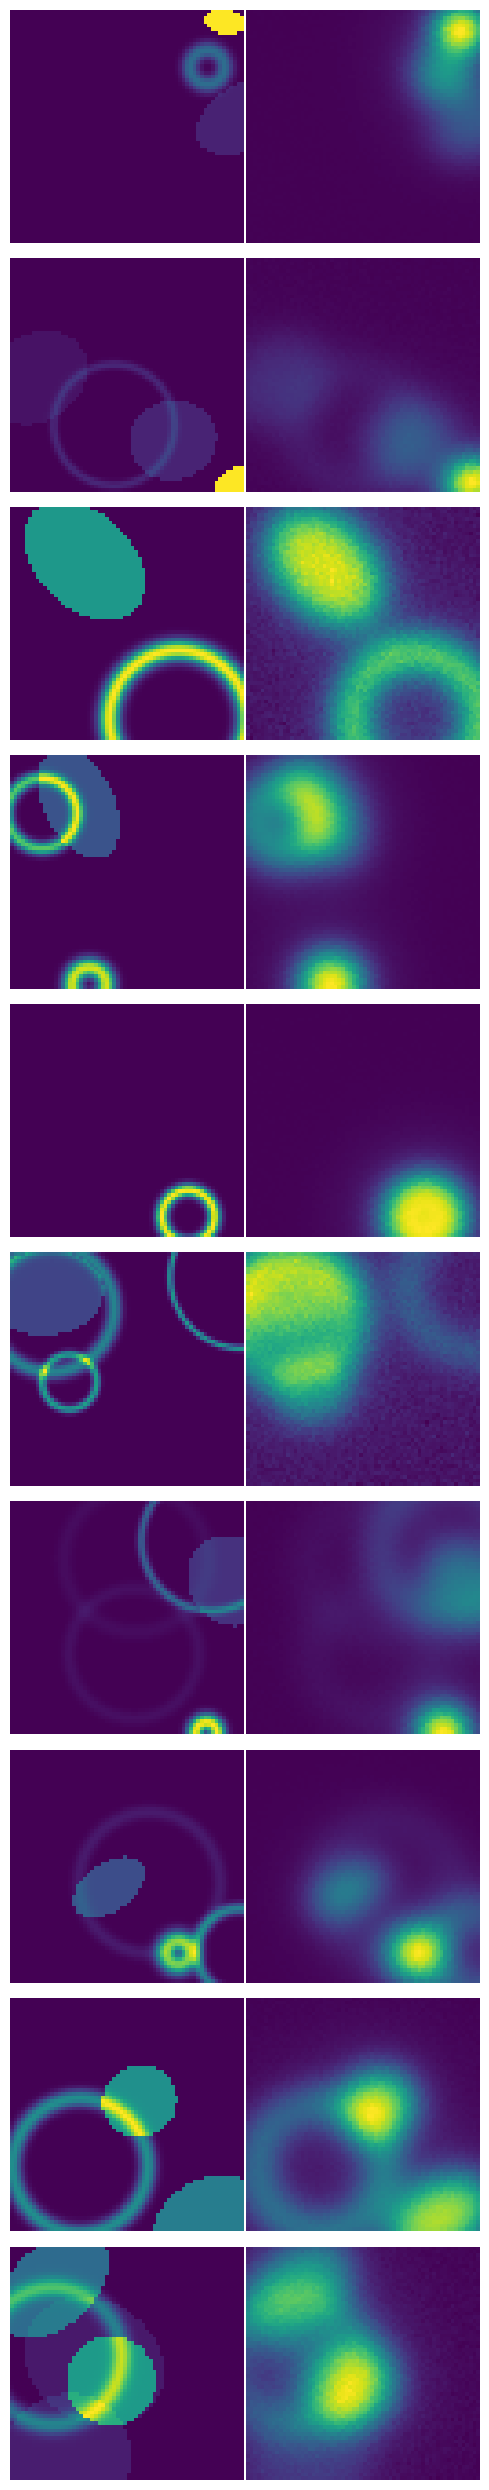

In [8]:
###### 02 数据集可视化 ######

import matplotlib.pyplot as plt

num_to_show = 10
rows, cols = num_to_show, 2  # 20 行 × 2 列

data = np.load("Train/disc_100_64_eval_v1.npy")

# 每张小图给定大小，比如宽2英寸，高2英寸
fig, axes = plt.subplots(rows, cols, figsize=(cols*2.5, rows*2.5))

for i in range(num_to_show):
    clear = data[i][0]
    blur  = data[i][1]
    axes[i, 0].imshow(clear, cmap="viridis")
    axes[i, 0].axis("off")
    axes[i, 1].imshow(blur, cmap="viridis")
    axes[i, 1].axis("off")

plt.tight_layout()
plt.show()

In [ ]:
###### 03 按顺序混合AB数据集 ######

import os
import numpy as np

# ===== 配置 =====
A_path = "halo_test_r1_v2.npy"
B_path = "xingwei_10000_64_train_v1.npy"
out_dir = "/root/autodl-fs"

# 命名规则：[简写]_[数量]_[图片大小]_[用途]_[预处理]_[版本].npy
short_name = "mixAB"
usage = "train"
preprocess = ""   # 没有可留空
version = "v1"

# ===== 读取 =====
A = np.load(A_path, allow_pickle=True)
B = np.load(B_path, allow_pickle=True)

# ===== 基础检查 =====
assert A.ndim == 4 and A.shape[1] == 2, f"A 应为 (N,2,H,W)，实际 {A.shape}"
assert B.ndim == 4 and B.shape[1] == 2, f"B 应为 (N,2,H,W)，实际 {B.shape}"
assert A.shape[2:] == B.shape[2:], f"H,W 不一致：A{A.shape[2:]}, B{B.shape[2:]}"

Na, _, H, W = A.shape
Nb = B.shape[0]

# ===== 顺序合并（先 A 后 B）=====
out = np.concatenate([A, B], axis=0)  # (Na+Nb, 2, H, W)

# ===== 生成规范文件名并保存 =====
parts = [short_name, str(out.shape[0]), str(H), usage]
if preprocess:
    parts.append(preprocess)
parts.append(version)
out_name = "_".join(parts) + ".npy"

os.makedirs(out_dir, exist_ok=True)
out_path = os.path.join(out_dir, out_name)
np.save(out_path, out)

print(f"已保存：{out_path}")
print(f"形状：{out.shape}  （A={A.shape}, B={B.shape}）")


In [ ]:
###### 04 将两个npy数组合并为验证集 ######


